In [2]:
# Required Libraries
from ucimlrepo import fetch_ucirepo
import mlxtend
print(mlxtend.__version__)
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

0.23.3


/opt/anaconda3/lib/python3.12/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


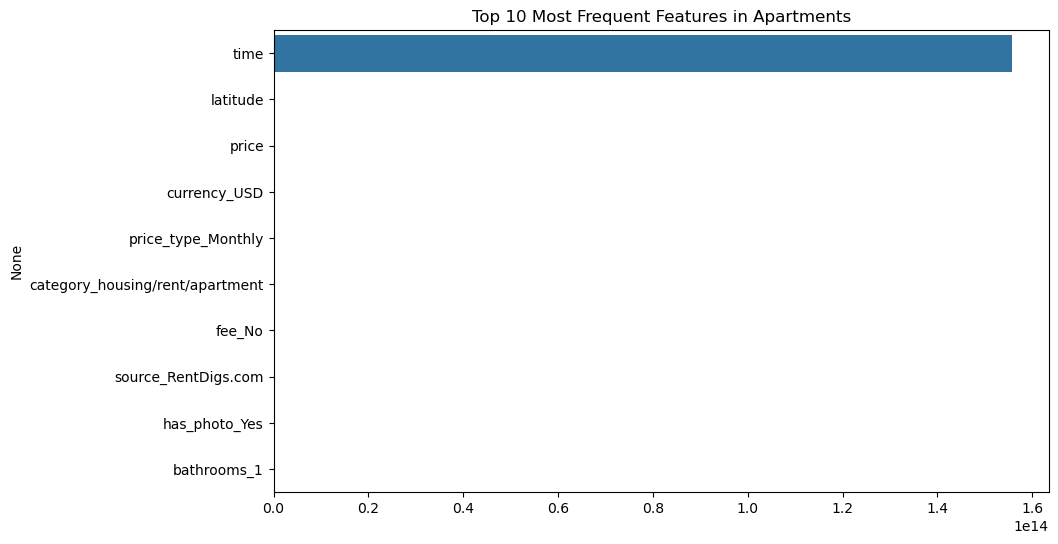

In [3]:
# Fetch Dataset 1: Apartment for Rent Classified
apartment_for_rent_classified = fetch_ucirepo(id=555)

# Fetch Dataset 2: Absenteeism at Work
absenteeism_at_work = fetch_ucirepo(id=445)

# Convert datasets to DataFrames
df_apartment = pd.DataFrame(apartment_for_rent_classified.data.features)
df_absenteeism = pd.DataFrame(absenteeism_at_work.data.features)

# One-hot encoding for transactional representation
df_apartment_encoded = pd.get_dummies(df_apartment)
df_absenteeism_encoded = pd.get_dummies(df_absenteeism)

# Visualize top items for Apartment dataset
item_counts = df_apartment_encoded.sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=item_counts.values[:10], y=item_counts.index[:10])
plt.title("Top 10 Most Frequent Features in Apartments")
plt.show()

In [4]:
# Check for missing values in the dataset
print(df_apartment_encoded.isnull().sum())
print(df_absenteeism_encoded.isnull().sum())

price                  5
latitude              29
longitude             31
time                   6
category_2             0
                      ..
source_SpreadMyAd      0
source_Z57             0
source_rentbits        0
source_tenantcloud     0
source_vFlyer          0
Length: 182964, dtype: int64
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index               

In [5]:
df_apartment_encoded.dropna(inplace=True)
df_absenteeism_encoded.dropna(inplace=True)

In [6]:
# Ensure all columns are boolean
df_apartment_encoded = df_apartment_encoded.astype(bool)
df_absenteeism_encoded = df_absenteeism_encoded.astype(bool)

In [7]:
# Generate frequent itemsets
frequent_itemsets_apartment = apriori(df_apartment_encoded, min_support=0.05, use_colnames=True)
print(frequent_itemsets_apartment.head())
frequent_itemsets_absenteeism = apriori(df_absenteeism_encoded, min_support=0.05, use_colnames=True)
print(frequent_itemsets_absenteeism.head())

    support                           itemsets
0  1.000000                            (price)
1  1.000000                         (latitude)
2  1.000000                        (longitude)
3  1.000000                             (time)
4  0.999389  (category_housing/rent/apartment)
    support                  itemsets
0  0.941892      (Reason for absence)
1  0.995946        (Month of absence)
2  1.000000         (Day of the week)
3  1.000000                 (Seasons)
4  1.000000  (Transportation expense)


In [8]:
from mlxtend.frequent_patterns import apriori
import pandas as pd

# Generate frequent itemsets
frequent_itemsets = apriori(df_apartment_encoded, min_support=0.05, use_colnames=True)

# Verify frequent itemsets
print(frequent_itemsets.head())

from itertools import combinations

# Function to calculate confidence and lift
def calculate_rules(frequent_itemsets):
    rules_list = []
    for _, row in frequent_itemsets.iterrows():
        items = list(row['itemsets'])
        if len(items) > 1:
            for i in range(1, len(items)):
                antecedents_combinations = list(combinations(items, i))
                for antecedent in antecedents_combinations:
                    consequent = set(items) - set(antecedent)
                    antecedent = frozenset(antecedent)

                    # Calculate support, confidence, and lift
                    antecedent_support = frequent_itemsets[
                        frequent_itemsets['itemsets'] == antecedent
                    ]['support'].values[0]
                    consequent_support = frequent_itemsets[
                        frequent_itemsets['itemsets'] == consequent
                    ]['support'].values[0]

                    confidence = row['support'] / antecedent_support
                    lift = confidence / consequent_support

                    # Append rule
                    rules_list.append({
                        'antecedents': antecedent,
                        'consequents': consequent,
                        'support': row['support'],
                        'confidence': confidence,
                        'lift': lift
                    })
    return pd.DataFrame(rules_list)

# Generate rules
rules_apartment = calculate_rules(frequent_itemsets)

# Display rules
print(rules_apartment)

    support                           itemsets
0  1.000000                            (price)
1  1.000000                         (latitude)
2  1.000000                        (longitude)
3  1.000000                             (time)
4  0.999389  (category_housing/rent/apartment)
                                               antecedents  \
0                                               (latitude)   
1                                                  (price)   
2                                                  (price)   
3                                              (longitude)   
4                                                  (price)   
...                                                    ...   
5525573  (source_RentDigs.com, has_photo_Yes, currency_...   
5525574  (source_RentDigs.com, has_photo_Yes, currency_...   
5525575  (source_RentDigs.com, currency_USD, bedrooms_2...   
5525576  (source_RentDigs.com, has_photo_Yes, bedrooms_...   
5525577  (has_photo_Yes, currency_US

In [9]:
# Filter rules with confidence >= 0.6
filtered_rules = rules_apartment[rules_apartment['confidence'] >= 0.6]
print(filtered_rules)

                                               antecedents  \
0                                               (latitude)   
1                                                  (price)   
2                                                  (price)   
3                                              (longitude)   
4                                                  (price)   
...                                                    ...   
5525572  (source_RentDigs.com, has_photo_Yes, currency_...   
5525573  (source_RentDigs.com, has_photo_Yes, currency_...   
5525574  (source_RentDigs.com, has_photo_Yes, currency_...   
5525576  (source_RentDigs.com, has_photo_Yes, bedrooms_...   
5525577  (has_photo_Yes, currency_USD, bedrooms_2, cate...   

                               consequents   support  confidence      lift  
0                                  {price}  1.000000    1.000000  1.000000  
1                               {latitude}  1.000000    1.000000  1.000000  
2                       

Association Rules (Apartment Dataset):
                                               antecedents  \
0                                               (latitude)   
1                                                  (price)   
2                                                  (price)   
3                                              (longitude)   
4                                                  (price)   
...                                                    ...   
5525573  (source_RentDigs.com, has_photo_Yes, currency_...   
5525574  (source_RentDigs.com, has_photo_Yes, currency_...   
5525575  (source_RentDigs.com, currency_USD, bedrooms_2...   
5525576  (source_RentDigs.com, has_photo_Yes, bedrooms_...   
5525577  (has_photo_Yes, currency_USD, bedrooms_2, cate...   

                               consequents   support  confidence      lift  
0                                  {price}  1.000000    1.000000  1.000000  
1                               {latitude}  1.000000    1.0000

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


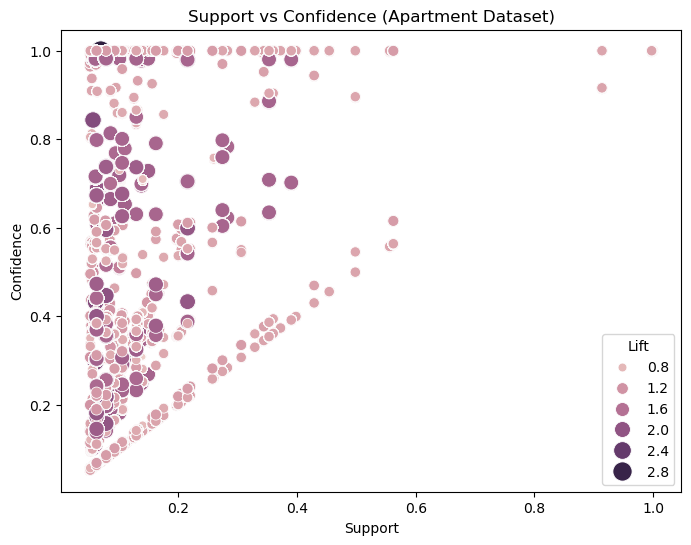

In [10]:
# Display rules for Apartment dataset
print("Association Rules (Apartment Dataset):")
print(rules_apartment[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Plot support vs confidence for the rules
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rules_apartment['support'], y=rules_apartment['confidence'], size=rules_apartment['lift'], sizes=(20, 200), hue=rules_apartment['lift'])
plt.title('Support vs Confidence (Apartment Dataset)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title="Lift")
plt.show()

In [11]:
# Compute conviction
rules_apartment['conviction'] = (1 - rules_apartment['support']) / (1 - rules_apartment['confidence'])

# Display metrics
print(rules_apartment[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']])

                                               antecedents  \
0                                               (latitude)   
1                                                  (price)   
2                                                  (price)   
3                                              (longitude)   
4                                                  (price)   
...                                                    ...   
5525573  (source_RentDigs.com, has_photo_Yes, currency_...   
5525574  (source_RentDigs.com, has_photo_Yes, currency_...   
5525575  (source_RentDigs.com, currency_USD, bedrooms_2...   
5525576  (source_RentDigs.com, has_photo_Yes, bedrooms_...   
5525577  (has_photo_Yes, currency_USD, bedrooms_2, cate...   

                               consequents   support  confidence      lift  \
0                                  {price}  1.000000    1.000000  1.000000   
1                               {latitude}  1.000000    1.000000  1.000000   
2                    